# Training Metrics

## patch size 32

In [5]:
import torch

# 39 train is patch embedding of 32 and 60 num of frames
m=torch.load('39_mtrain.pt',map_location=torch.device('cpu'))


In [2]:
m.keys()

dict_keys(['model_state_dict', 'optimizer_state_dict', 'train_loss', 'val_loss', 't_wer', 'v_wer', 'epoch'])

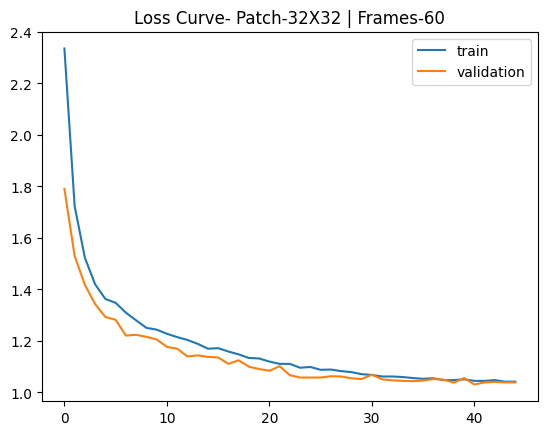

In [20]:
import matplotlib.pyplot as plt 


plt.plot(m['train_loss'],label='train')
plt.plot(m['val_loss'],label='validation')

plt.title('Loss Curve- Patch-32X32 | Frames-60')
plt.legend()
plt.show()

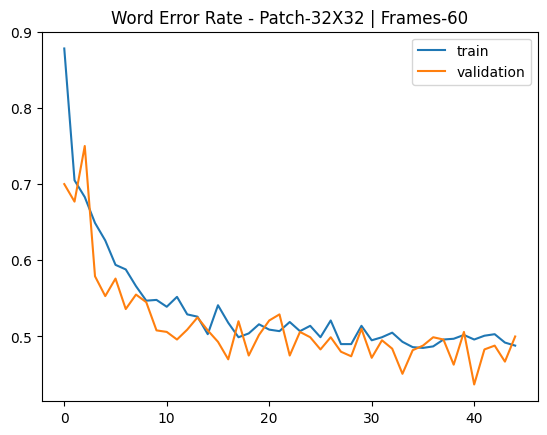

In [19]:
plt.plot(m['t_wer'],label='train')
plt.plot(m['v_wer'],label='validation')

plt.title('Word Error Rate - Patch-32X32 | Frames-60')
plt.legend()
plt.show()

## patch size 32

In [9]:
import torch
m1=torch.load('44_mtrain.pt',map_location=torch.device('cpu'))

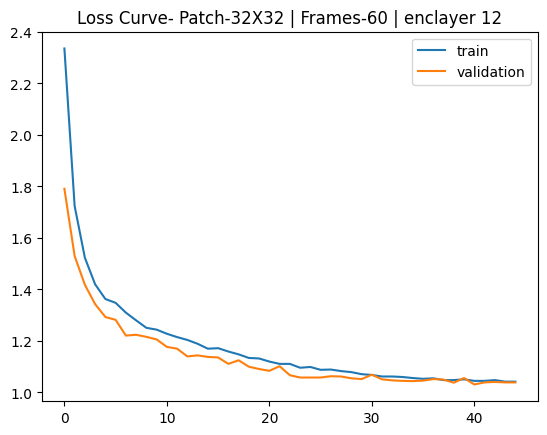

In [11]:
import matplotlib.pyplot as plt 


plt.plot(m1['train_loss'],label='train')
plt.plot(m1['val_loss'],label='validation')

plt.title('Loss Curve- Patch-32X32 | Frames-60 | enclayer 12')
plt.legend()
plt.show()

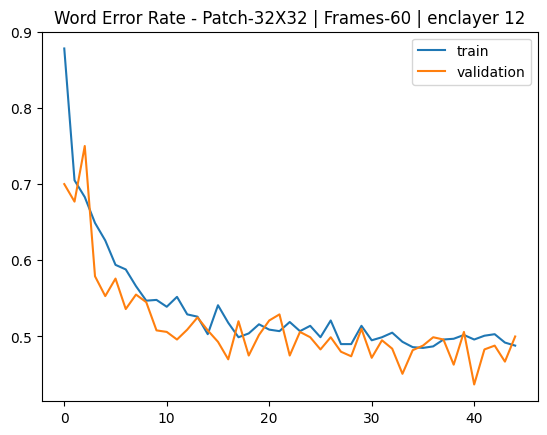

In [12]:
plt.plot(m1['t_wer'],label='train')
plt.plot(m1['v_wer'],label='validation')

plt.title('Word Error Rate - Patch-32X32 | Frames-60 | enclayer 12')
plt.legend()
plt.show()

## 16 by 16 patch 6 encoder layer 8 attention head

In [1]:
import torch
m2=torch.load('19_mtrain.pt',map_location=torch.device('cpu'))

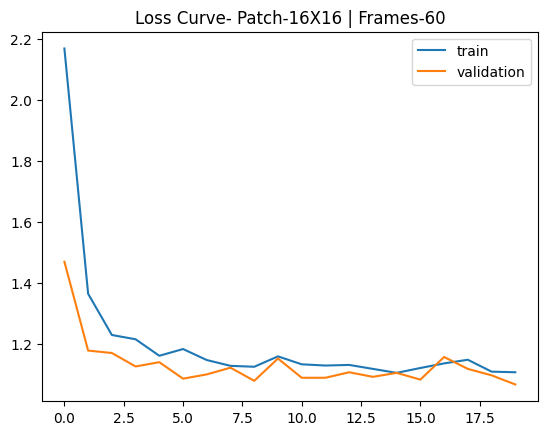

In [13]:
import matplotlib.pyplot as plt 


plt.plot(m2['train_loss'],label='train')
plt.plot(m2['val_loss'],label='validation')

plt.title('Loss Curve- Patch-16X16 | Frames-60')
plt.legend()
plt.show()

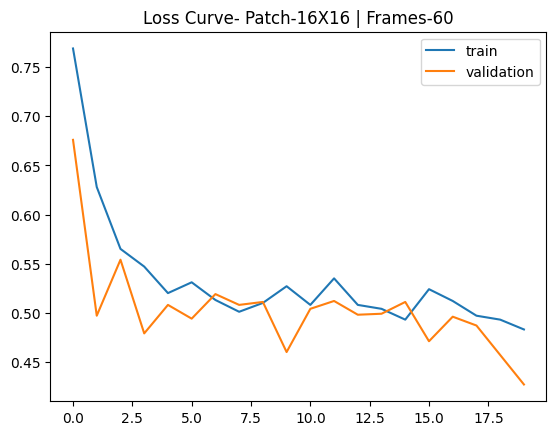

In [7]:
plt.plot(m2['t_wer'],label='train')
plt.plot(m2['v_wer'],label='validation')

plt.title('Loss Curve- Patch-16X16 | Frames-60')
plt.legend()
plt.show()

# Pytorch video test

In [1]:
from torch.utils.data import DataLoader
import pytorchvideo.data


from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    Resize,
)

def normalize(x):
    return x/255.0

resize_to = (224, 224)
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(32),
                    Lambda(normalize),
                    Normalize(mean, std),
                    Resize(resize_to),
                ]
            ),
        ),

    ]
)

labeled_video_paths = [("/home/bikasherl/Desktop/Final_Project_Bajra/apps/uploaded_videos/20_4.mp4", {"label": 2})]


infer_dataset = pytorchvideo.data.LabeledVideoDataset(
    labeled_video_paths=labeled_video_paths,
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", 5),
    decode_audio=False,
    transform=val_transform,
)

loader=DataLoader(infer_dataset,batch_size=1)

next(iter(loader))['video'].shape

/home/bikasherl/miniconda3/envs/bajra_pro/lib/python3.9/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/home/bikasherl/miniconda3/envs/bajra_pro/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies

torch.Size([1, 3, 32, 224, 224])